#Spam Email Classification Using The Naive Bayes Classifier

## 1. Defining the Question

### a) Specifying the Data Analytic Question

To determine whether an email is a spam or not

### b) Defining the Metric for Success

To be able to create a model that can classifies an email as spam or not

### c) Understanding the context 

The dataset is a collection of spam e-mails that came from their postmaster and individuals who had filed spam. 

The collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. 

Data Glossary:

48 continuous real [0,100] attributes of type word_freq_WORD = percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR] = percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

### d) Recording the Experimental Design

Defining the Question

Reading the Data

Data Exploration and Cleaning

Perform Naive Bayes Classification using different test and train sizes

Evaluation of the model performance

Challenging the solution

Conclusion and recommendation

### e) Data Relevance

The data is from a relevant source, UCI Machine Learning Centre. 

Below is the link to the dataset

https://archive.ics.uci.edu/ml/datasets/Spambase



## 2. Reading the Data

In [ ]:
# improting the neccessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder as Le
from sklearn.preprocessing import LabelEncoder as Le
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import decomposition
from imblearn.over_sampling import RandomOverSampler
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Loading the Data from the source i.e. csv
# ---
# ---
#
spamm = pd.read_csv('spambase.csv')

# previewing
spamm.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1




## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
#
spamm.shape

# the dataset has 4000 rows and 58 columns

(4600, 58)

In [ ]:
# Previewing the top of our dataset
#
spamm.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
# Previewing the bottom of our dataset
# 
spamm.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
# Editting the column names
headers = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

# applying 
spamm.columns = headers

# previewing
spamm.head(2)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [ ]:
# Checking whether each column has an appropriate datatype
#
spamm.info()

# all the data types are correct

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4209 non-null   float64
 1   word_freq_address           4209 non-null   float64
 2   word_freq_all               4209 non-null   float64
 3   word_freq_3d                4209 non-null   float64
 4   word_freq_our               4209 non-null   float64
 5   word_freq_over              4209 non-null   float64
 6   word_freq_remove            4209 non-null   float64
 7   word_freq_internet          4209 non-null   float64
 8   word_freq_order             4209 non-null   float64
 9   word_freq_mail              4209 non-null   float64
 10  word_freq_receive           4209 non-null   float64
 11  word_freq_will              4209 non-null   float64
 12  word_freq_people            4209 non-null   float64
 13  word_freq_report            4209 

## 4. External Data Source Validation

### a.Validation

The dataset was from a reliable source.

## 5. Tidying the Dataset

In [ ]:
# Identifying the Missing Data
#
spamm.isnull().sum()

# there are no missing values

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
# checking for duplicates
spamm.duplicated().sum()

# there are 391 duplicates which we will drop

391

In [ ]:
# dropping duplicates
spamm  = spamm.drop_duplicates()


In [ ]:
# confirming the drop
spamm.duplicated().sum()

# all duplicates have been dropped

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

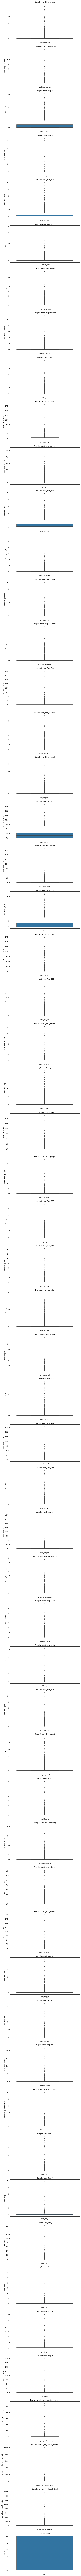

In [ ]:
# Checking for Outliers
# we plot subplots to check for outliers

plt.show()

fig, ax = plt.subplots(len(spamm.columns), figsize = (8, 300))

for i, col_val in enumerate(spamm.columns):

  sns.boxplot(y= spamm[col_val], ax=ax[i])
  ax[i].set_title('Box plot-{}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize=8)

# There are outliers in all columns, however we will not remove them 
# as this is expected for email services

## 6. Exploratory Analysis

In [ ]:
# plotting summary statistics
spamm.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,...,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,...,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.00000,1.000000


In [ ]:
# exploring the target variable 
spamm['spam'].value_counts()

0    2531
1    1678
Name: spam, dtype: int64

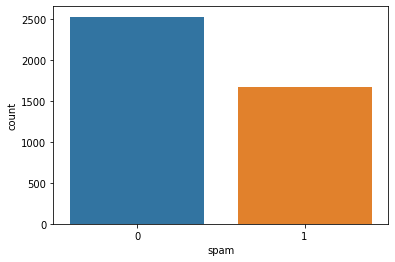

In [ ]:
#plotting a countplot to see the distribution of spam emails
sns.countplot(x='spam', data=spamm)

# not spam (0)
# spam (1) 
# the number of spam emails was lower than those that were not spam

In [ ]:
# Checking for the variable correlations
#
spamm.corr()

# spam moderately correlates to word_freq_remove, (corr coeff = 0.334605)
# spam least correlates to word_freq_3d, (corr coeff = 0.056407)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,...,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,...,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,...,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,...,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,...,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,...,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402,0.212455
word_freq_remove,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,...,-0.034092,-0.061357,-0.029478,0.051036,0.067215,0.049300,0.039171,0.050828,-0.017082,0.334605
word_freq_internet,-0.004392,0.013781,0.007263,0.003798,0.023410,0.079683,0.033675,1.000000,0.106872,0.079023,...,-0.028986,-0.042785,-0.021393,0.029069,0.053550,-0.008128,0.009974,0.035606,0.036894,0.200780
word_freq_order,0.103818,0.053525,0.077618,-0.001044,0.014482,0.097012,0.049216,0.106872,1.000000,0.123341,...,-0.015016,-0.037420,0.017308,0.035985,0.152436,-0.002084,0.110786,0.166304,0.233199,0.221591
word_freq_mail,0.040799,0.184441,0.025201,-0.003849,0.027232,0.010068,0.055670,0.079023,0.123341,1.000000,...,0.006757,-0.005008,0.003785,0.031657,0.077378,0.034473,0.073125,0.101552,0.078587,0.131822


In [ ]:
# checking colums
spamm.columns.to_list()

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

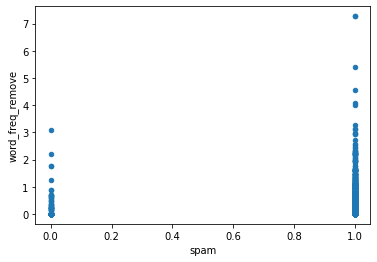

In [ ]:
# plotting to see the correlation between spam and word_freq_remove, (corr coeff = 0.334605) 
spamm.plot.scatter(x = 'spam', y = 'word_freq_remove')


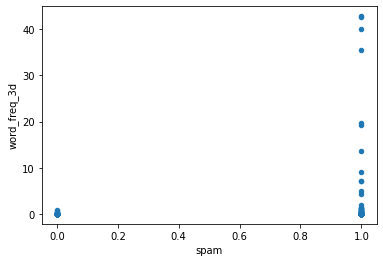

In [ ]:
# plotting to see the correlation between spam and word_freq_3d, (corr coeff = 0.056407)
#plt.scatter(spamm.spam, spam.word_freq_3d,)
spamm.plot.scatter(x = 'spam', y = 'word_freq_3d')


## 7. Implementing the Solution

## Modelling

### Splitting our dataset

In [ ]:
# Splitting our dataset into labels and attributes: y and X respectively
X = spamm.iloc[:,:57]
y = spamm.iloc[:,-1]


### Gaussian naive bayes classifier

We will use gausian classifier since most features in this dataset are continuous.

#### Model 1: 80-20

In [ ]:
# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# We will use the gaussian naive bayes classifier
# creating and fitting the model
clf = GaussianNB().fit(X_train, y_train)
model = clf.fit(X_train, y_train)


In [ ]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Our model is 81.47% accurate
# this is a good performance

0.8147268408551069


In [61]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1
 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1
 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1
 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1
 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1
 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 0 1 1 1 0 0 

In [ ]:
# Checking the  model performance

print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print("F1 score", f1_score(y_test,y_pred))
print('_'* 50)
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print('_'* 50)
print('Classification Report:',classification_report(y_test, y_pred))

Training Accuracy: 0.8313038313038313
Test Accuracy: 0.8147268408551069
F1 score 0.8115942028985507
__________________________________________________
Confusion Matrix: [[350 145]
 [ 11 336]]
__________________________________________________
Classification Report:               precision    recall  f1-score   support

           0       0.97      0.71      0.82       495
           1       0.70      0.97      0.81       347

    accuracy                           0.81       842
   macro avg       0.83      0.84      0.81       842
weighted avg       0.86      0.81      0.82       842



Our model is 81.47% accurate which shows it is a good performing model.

We will however evaluate performance using differesnt test and train proportions and compare to see which one performs best

#### Model 2: 70-30

In [62]:
# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [63]:
# We will use the gaussian naive bayes classifier
# creating and fitting the model
clf = GaussianNB().fit(X_train, y_train)
model = clf.fit(X_train, y_train)


In [64]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Our model is 81.47% accurate
# this is a good performance

0.8250197941409343


The model accuracy is seen to have improved to 82.50% from the previous value whic was 81.47%

We will evaluate our last proportion split, which is 60 - 40

#### Model 3: 60-40

In [65]:
# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [66]:
# We will use the gaussian naive bayes classifier
# creating and fitting the model
clf = GaussianNB().fit(X_train, y_train)
model = clf.fit(X_train, y_train)


In [67]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Our model is 83.01% accurate
# this is a good performance

0.830166270783848


The model accuracy has again improved to 83.01% from the previous model which was 82.50%.

We can conclude that this is our optimal model since a further split, which could be 50-50 could most likely be biased.

## 8. Challenging the solution

Our best model is model 3 with an accuracy of 83.01%. We will try a different feature selection to see if the performance will change in any way.

In [76]:
# Reviewing the Solution 
#
# Splitting our dataset into labels and attributes: y and X respectively
# using the first 50 features
X = spamm.iloc[:,:50]
y = spamm.iloc[:,-1]

#### Model 4: 60-40 (With reduced test features)

In [77]:
# Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [78]:
# We will use the gaussian naive bayes classifier
# creating and fitting the model
clf = GaussianNB().fit(X_train, y_train)
model = clf.fit(X_train, y_train)


In [79]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

# Our model is 83.01% accurate
# this is a good performance

0.8200712589073634


When we reduce the number of test features to 50 from 57, our accuracy goes down 82% compared to our optimal model accuracy.

Therefore model 3 is still our optimal model.

#Conclusion and Recommendation

We get the best model when we do a 60-40 split. 

The accuracy of such a model is 83.01%

## 9. Follow up questions

### a). Did we have the right data?

Yes, we made spam email classification predictions with a good accuracy

### b). Do we need other data to answer our question?

No neccessarily

### c). Did we have the right question?

Yes.